<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       1

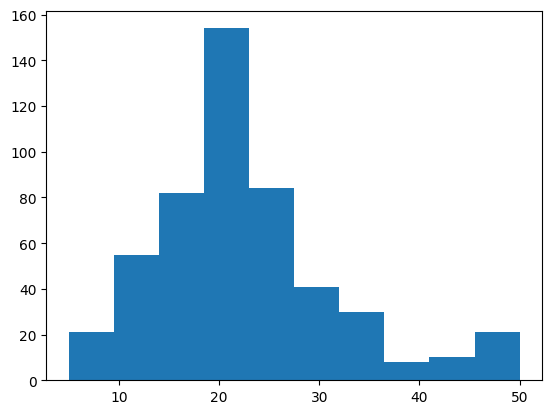

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 2.9600e+02 1.5300e+01 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 7.8800e+00]] [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset 1: Boston Housing
dataset1 = pd.read_csv('boston.csv')
dataset1 = dataset1.apply(pd.to_numeric, errors='coerce')

dataset1 = dataset1.replace('?', pd.NA).dropna()

# Basic Statistics
statistics1 = dataset1.describe()

print(dataset1.head)
plt.hist(dataset1['MEDV'])
print('Plot of Dataset 1 MEDV')
plt.show()

X = dataset1.drop('MEDV', axis=1).values  # Convert DataFrame to numpy array
y = dataset1['MEDV'].values  # Convert DataFrame to numpy array

if X.ndim == 1:
    X = X[:, None]

if y.ndim == 1:
    y = y[:, None]


print(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [11]:
# linear regression# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions


def hypothesis(X, theta):
	return np.dot(X, theta)

# function to compute gradient of error function w.r.t. theta


def gradient(X, y, theta):
	h = hypothesis(X, theta)
	grad = np.dot(X.transpose(), (h - y))
	return grad

# function to compute the error for current values of theta


def cost(X, y, theta):
	h = hypothesis(X, theta)
	J = np.dot((h - y).transpose(), (h - y))
	J /= 2
	return J[0]

# function to create a list containing mini-batches


def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	i = 0

	for i in range(n_minibatches + 1):
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	if data.shape[0] % batch_size != 0:
		mini_batch = data[i * batch_size:data.shape[0]]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	return mini_batches

# function to perform mini-batch gradient descent


def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
	theta = np.zeros((X.shape[1], 1))
	error_list = []
	max_iters = 3
	for itr in range(max_iters):
		mini_batches = create_mini_batches(X, y, batch_size)
		for mini_batch in mini_batches:
			X_mini, y_mini = mini_batch
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
			error_list.append(cost(X_mini, y_mini, theta))

	return theta, error_list


Bias =  [-1.32883293e+154]
Coefficients =  [[-1.04848168e+155]
 [-7.60387757e+154]
 [-2.75963976e+152]
 [-3.90610030e+153]
 [-4.43397009e+154]
 [-4.76852192e+155]
 [-2.84665873e+154]
 [-7.04094641e+154]
 [-2.93413729e+156]
 [-1.28455825e+155]
 [-9.43261695e+154]]


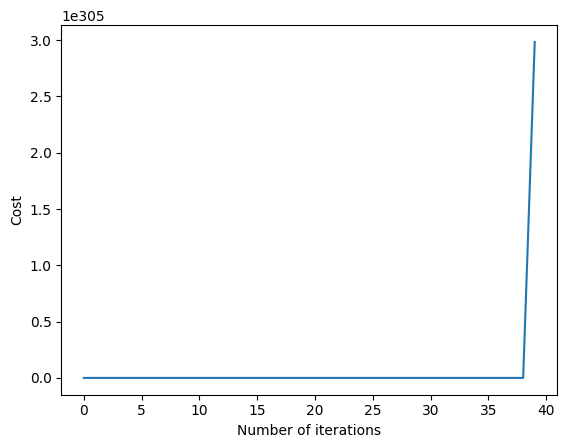

In [12]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()
